# Support Vector Machines

## Iris dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.target.shape

(150,)

In [5]:
x = iris.data[:, [0,2]]
y = iris.target

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,
                                                    random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(135, 15, 135, 15)

In [7]:
linear_svm = svm.SVC(kernel='linear',C=1,gamma='auto').fit(x_train,y_train)
linear_svm

SVC(C=1, gamma='auto', kernel='linear')

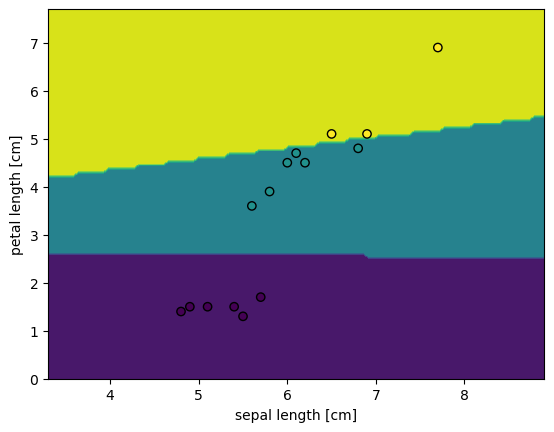

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

disp = DecisionBoundaryDisplay.from_estimator(linear_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")
# disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor="k")

In [9]:
y_pred = linear_svm.predict(x_test)
mc = confusion_matrix(y_test, y_pred)
mc

array([[6, 0, 0],
       [0, 6, 0],
       [0, 0, 3]], dtype=int64)

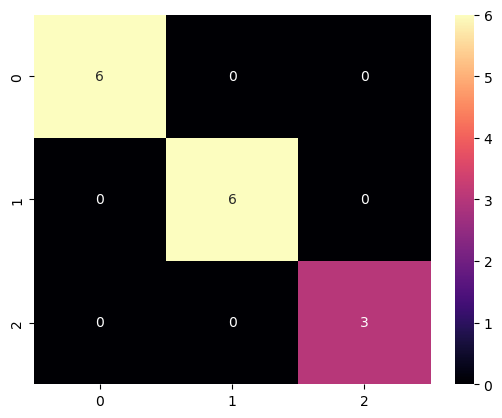

In [10]:
import seaborn as sns

heatmap = sns.heatmap(mc, cmap='magma', annot=True)

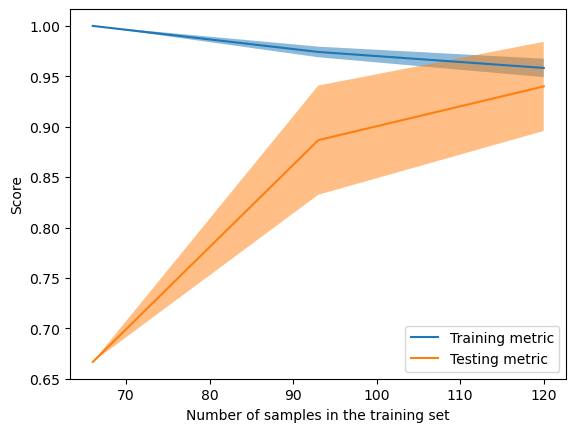

In [11]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(linear_svm,X=x,y=y,score_type="both")

Kernel polinomial, RBF, sigmoide

In [12]:
polinomial_svm = svm.SVC(kernel='poly',C=1,gamma='auto').fit(x_train,y_train)
polinomial_svm

SVC(C=1, gamma='auto', kernel='poly')

In [13]:
y_pred = polinomial_svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

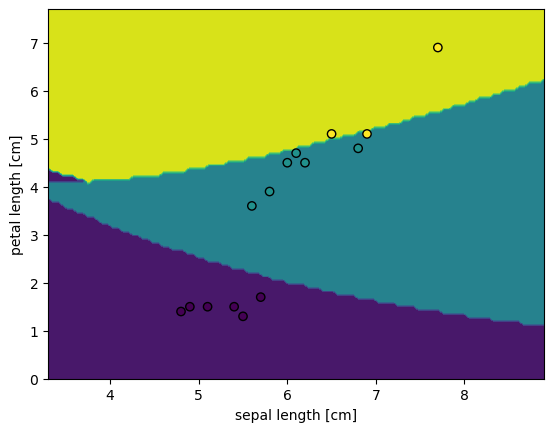

In [14]:
disp = DecisionBoundaryDisplay.from_estimator(polinomial_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")

In [15]:
rbf_svm = svm.SVC(kernel='rbf',C=1,gamma='auto').fit(x_train,y_train)
rbf_svm

SVC(C=1, gamma='auto')

In [16]:
y_pred = rbf_svm.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

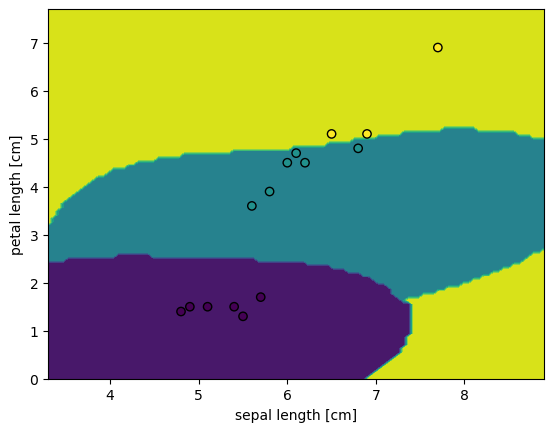

In [17]:
disp = DecisionBoundaryDisplay.from_estimator(rbf_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")

In [18]:
sigmoid_svm = svm.SVC(kernel='sigmoid',C=1,gamma='auto').fit(x_train,y_train)
sigmoid_svm

SVC(C=1, gamma='auto', kernel='sigmoid')

In [19]:
y_pred = sigmoid_svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.2

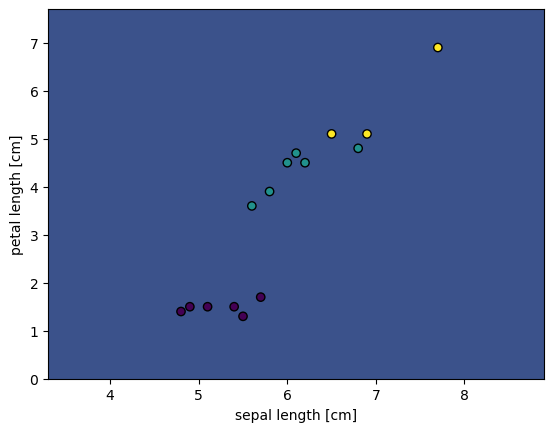

In [20]:
disp = DecisionBoundaryDisplay.from_estimator(sigmoid_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")

Diferentes SVMs com kernel RBF:

C:
* .1
* 1
* 10

gamma:
* .1
* 1
* 10

### C = 0.1, gamma = 0.1

In [21]:
rbf_svm = svm.SVC(kernel='rbf',C=0.1,gamma=0.1).fit(x_train,y_train)
rbf_svm

SVC(C=0.1, gamma=0.1)

In [22]:
y_pred = rbf_svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

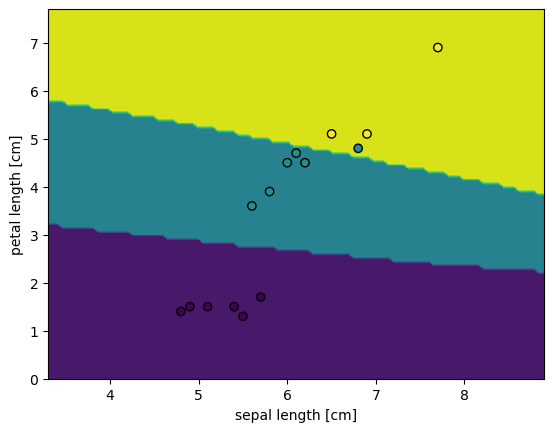

In [23]:
disp = DecisionBoundaryDisplay.from_estimator(rbf_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")

### C = 0.1, gamma = 1

In [24]:
rbf_svm = svm.SVC(kernel='rbf',C=0.1,gamma=1).fit(x_train,y_train)
rbf_svm

SVC(C=0.1, gamma=1)

In [25]:
y_pred = rbf_svm.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

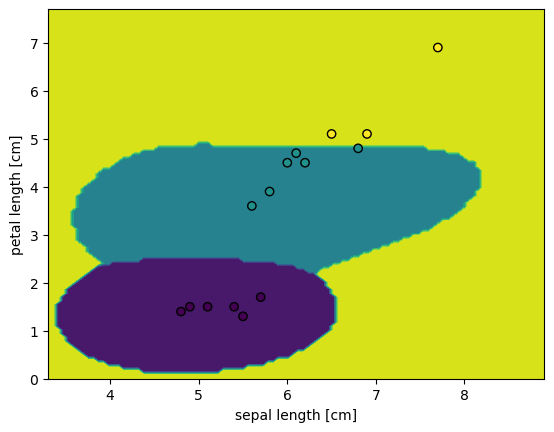

In [26]:
disp = DecisionBoundaryDisplay.from_estimator(rbf_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")

### C = 0.1, gamma = 10

In [27]:
rbf_svm = svm.SVC(kernel='rbf',C=0.1,gamma=10).fit(x_train,y_train)
rbf_svm

SVC(C=0.1, gamma=10)

In [28]:
y_pred = rbf_svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.8666666666666667

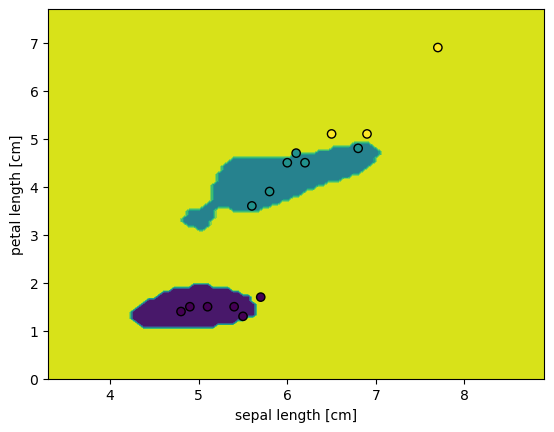

In [29]:
disp = DecisionBoundaryDisplay.from_estimator(rbf_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")

### C = 1, gamma = 0.1

In [30]:
rbf_svm = svm.SVC(kernel='rbf',C=1,gamma=0.1).fit(x_train,y_train)
rbf_svm

SVC(C=1, gamma=0.1)

In [31]:
y_pred = rbf_svm.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

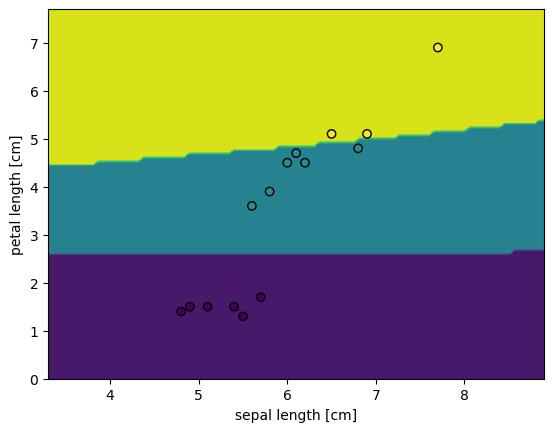

In [32]:
disp = DecisionBoundaryDisplay.from_estimator(rbf_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")

### C = 1, gamma = 1

In [33]:
rbf_svm = svm.SVC(kernel='rbf',C=1,gamma=1).fit(x_train,y_train)
rbf_svm

SVC(C=1, gamma=1)

In [34]:
y_pred = rbf_svm.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

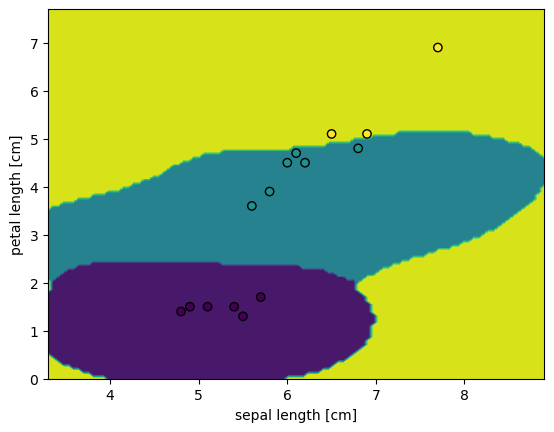

In [35]:
disp = DecisionBoundaryDisplay.from_estimator(rbf_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")

### C = 1, gamma = 10

In [36]:
rbf_svm = svm.SVC(kernel='rbf',C=1,gamma=10).fit(x_train,y_train)
rbf_svm

SVC(C=1, gamma=10)

In [37]:
y_pred = rbf_svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

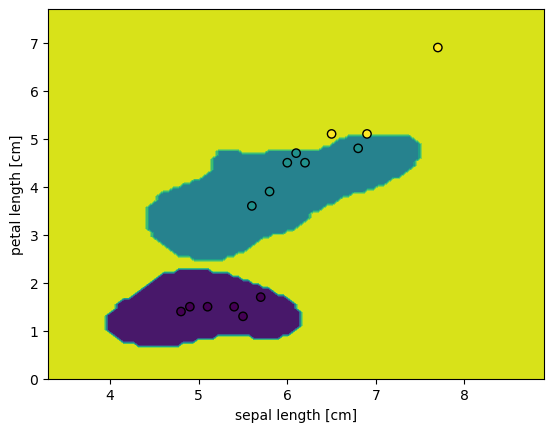

In [38]:
disp = DecisionBoundaryDisplay.from_estimator(rbf_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")

### C = 10, gamma = 0.1

In [39]:
rbf_svm = svm.SVC(kernel='rbf',C=10,gamma=0.1).fit(x_train,y_train)
rbf_svm

SVC(C=10, gamma=0.1)

In [40]:
y_pred = rbf_svm.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

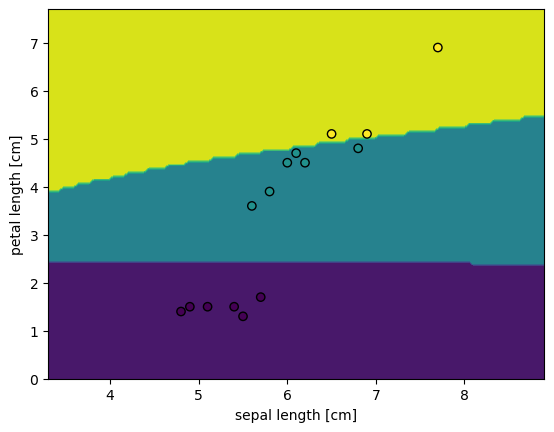

In [41]:
disp = DecisionBoundaryDisplay.from_estimator(rbf_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")

### C = 10, gamma = 1

In [42]:
rbf_svm = svm.SVC(kernel='rbf',C=10,gamma=1).fit(x_train,y_train)
rbf_svm

SVC(C=10, gamma=1)

In [43]:
y_pred = rbf_svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

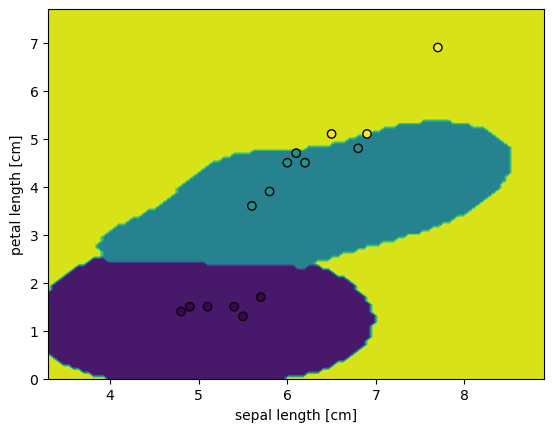

In [44]:
disp = DecisionBoundaryDisplay.from_estimator(rbf_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")

### C = 10, gamma = 10

In [45]:
rbf_svm = svm.SVC(kernel='rbf',C=10,gamma=10).fit(x_train,y_train)
rbf_svm

SVC(C=10, gamma=10)

In [46]:
y_pred = rbf_svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

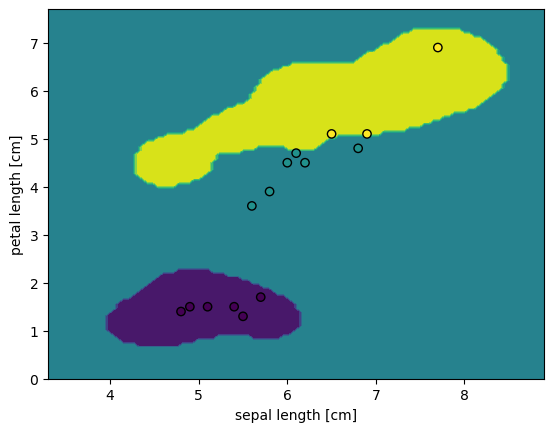

In [47]:
disp = DecisionBoundaryDisplay.from_estimator(rbf_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")